In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
data = pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [13]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [14]:
data['department'] = data['department'].where(data['department']=='finishing', 'sewing')

data['wip'] = data['wip'].replace(np.NaN, np.mean(data['wip']))

In [15]:
from sklearn.preprocessing import LabelEncoder

data[['quarter', 'department', 'day']] = data[['quarter', 'department', 'day']].apply(LabelEncoder().fit_transform)

data = data.drop(['date', 'targeted_productivity'], axis=1)


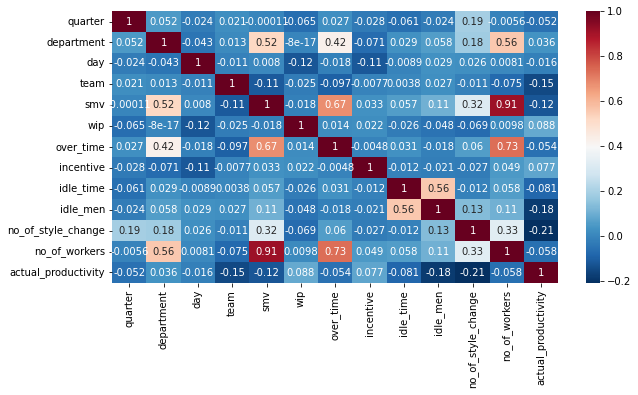

In [16]:
corr_x = data.corr(method='pearson')
plt.figure(figsize=(10, 5)) 
sns.heatmap(corr_x, annot=True, cmap='RdBu_r')
plt.show()

In [19]:
#threshold of 0.7
#data = data.drop('num_of_workers', axis=1)


In [23]:
X = data.drop('actual_productivity', axis=1)
y = data['actual_productivity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
LR = LinearRegression()
LR.fit(x_train_scaled, y_train)
y_pred = LR.predict(x_test_scaled)

print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

6.440135175357165
0.12937364150132502
0.029591308203271074


In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

feature_translator = [
 (f'x{i}', feature) for i, feature in enumerate(x_train.columns, 0)
]
def translate_feature_names(s):
    for key, val in feature_translator:
        s = s.replace(key, val)
    return s
poly_features = [
 translate_feature_names(f) for f in poly.get_feature_names()
]
x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)


reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)
y_pred = reg.predict(x_test_poly)


print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-3446087.569044272
2.074860123927164
1089.9673559063403


In [33]:
from sklearn.linear_model import Lasso, LassoCV
las = Lasso(fit_intercept=False)
las.fit(x_train_poly, y_train)
y_pred = las.predict(x_test_poly)

print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-51.11887636153713
0.1239580584623584
0.04779619181929843


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.545e+00, tolerance: 4.816e-02
  model = cd_fast.enet_coordinate_descent(


In [37]:
alpha = np.logspace(-6, 6, 50)
las = LassoCV(alphas=alpha, fit_intercept=False, cv=5)
las.fit(x_train_poly, y_train)
y_pred = las.predict(x_test_poly)

print(r2_score(y_test, y_pred)*100)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.28580339440187, tolerance: 0.038666913141095306
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.13892771757911, tolerance: 0.038666913141095306
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.12244802439636, tolerance: 0.038666913141095306
  model = cd_fast.enet_coordinate_descent_gra

-758.579878692718
0.42375701285022
0.2715534257680058


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+02, tolerance: 4.816e-02
  model = cd_fast.enet_coordinate_descent(
